# Проект "Приоритизация гипотез и анализ результатов А/В-теста"

### ЗАДАНИЕ

#### **Описание данных**

**Данные для первой части:**  
Путь к файлу у ревьюера: "/datasets/hypothesis.csv".   
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

**Данные для второй части:**  
Путь к файлу у ревьюера: "/datasets/orders.csv".   
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  

Путь к файлу у ревьюера: "/datasets/visitors.csv".   
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.  

#### **Описание проекта**  

**Часть 1. Приоритизация гипотез.**  
В файле "/datasets/hypothesis.csv" 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

**Задача**  
Примените фреймворки ICE и RICE для приоритизации гипотез. Сравните результаты.

**Часть 2. Анализ A/B-теста**  
Результаты проведённого A/B-теста в файлах "/datasets/orders.csv" и "/datasets/visitors.csv".  

**Задача**  
Выполните анализ результатом A/B-теста:  
а) Постройте график кумулятивной выручки в зависимости от группы.  
б) Постройте график кумулятивного среднего чека в зависимости от группы.  
в) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.  
г) Постройте график кумулятивной конверсии в зависимости от группы.   
д) Постройте график относительного изменения кумулятивной конверсии группы B к группе A.   
е) Постройте точечный график количества заказов по пользователям.   
ж) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.    
и) Постройте диаграмму распределения стоимостей заказов.   
к) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.    
л) Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.     
м) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.   
н) Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.   
п) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.   
р) Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### СОДЕРЖАНИЕ

### Часть 0. Подготовка данных
#### 0.1 Датасет HYPOTHESIS (HYPO)
#### 0.2 Датасет ORDERS
#### 0.3 Датасет VISITORS (VISI)

### Часть 1. Приоритизация гипотез

### Часть 2. Анализ A/B-теста
#### а) Графики кумулятивной выручки по группам
#### б) Графики кумулятивного среднего чека по группам
#### в) График относительного изменения кумулятивного среднего чека группы B к группе A
#### г) Графики кумулятивной конверсии по группам
#### д) График относительного изменения кумулятивной конверсии группы B к группе A
#### е) Точечный график количества заказов по пользователям
#### ж) 95-й и 99-й перцентили количества заказов на пользователя
#### и) Диаграмма распределения стоимостей заказов
#### к) 95-й и 99-й перцентили стоимости заказов
#### л) Статистическая значимость различий в конверсии между группами по «сырым» данным
#### м) Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
#### н) Статистическая значимость различий в конверсии между группами по «очищенным» данным
#### п) Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
#### р) Решение по результатам теста

### Вывод

<a id='p0'></a>
## Часть 0. Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
import scipy.stats as stats
from collections import Counter

In [2]:
pth1 = '/datasets/hypothesis.csv'
pth2 = 'D:/ab_test_project/hypothesis.csv'

if os.path.exists(pth1):
    hypo = pd.read_csv(pth1)
elif os.path.exists(pth2):
    hypo = pd.read_csv(pth2)
else:
    print('Ошибка месторасположения csv-файла "hypothesis"')
    
pth3 = '/datasets/orders.csv'
pth4 = 'D:/ab_test_project/orders.csv'

if os.path.exists(pth3):
    orders = pd.read_csv(pth3)
elif os.path.exists(pth4):
    orders = pd.read_csv(pth4)
else:
    print('Ошибка месторасположения csv-файла "orders"')    
    
pth5 = '/datasets/visitors.csv'
pth6 = 'D:/ab_test_project/visitors.csv'

if os.path.exists(pth5):
    visi = pd.read_csv(pth5)
elif os.path.exists(pth6):
    visi = pd.read_csv(pth6)
else:
    print('Ошибка месторасположения csv-файла "visitors"')      

<a id='p0.1'></a>
#### 0.1 Датасет HYPOTHESIS (HYPO)

In [3]:
pd.set_option('display.max_colwidth', None) # для отображения во всю длину строки
hypo.info()
print()
hypo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Опишем увиденный датасет

`Hypothesis` — краткое описание гипотезы, **объекты**;

`Reach` — охват пользователей по 10-балльной шкале, **целые числа**;

`Impact` — влияние на пользователей по 10-балльной шкале, **целые числа**;

`Confidence` — уверенность в гипотезе по 10-балльной шкале, **целые числа**;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы, **целые числа**.

Пропусков нет.

**Названия всех столбцов нужно привести к змеиному регистру.** Что мы и сделаем.

In [4]:
hypo.columns=['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [5]:
hypo.head(1)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


Пока что отвлечёмся от этого датасета.

<a id='p0.2'></a>
#### 0.2 Датасет ORDERS

In [6]:
orders.info()
print()
display(orders.head())
print()
type(orders.loc[0, 'date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


str

Опишем, что мы увидели выше.

`transactionId` — идентификатор заказа, **целые числа, название столбца нужно привести к змеиному регистру**;  

`visitorId` — идентификатор пользователя, совершившего заказ, **целые числа, название столбца нужно привести к змеиному регистру**;  

`date` — дата, когда был совершён заказ, **объекты, нужно привести к формату date**;  

`revenue` — выручка заказа, **целые числа**;  

`group` — группа A/B-теста, в которую попал заказ, **объекты**.

Пропусков нигде нет.

Названия столбцов к змеиному регистру:

In [7]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.head(1)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


Даты к `date`:

In [8]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d').dt.date
type(orders.loc[0, 'date'])

datetime.date

Проверим на полные дубликаты.

In [9]:
orders.duplicated().sum()

0

Полных дубликатов нет, это хорошо.

Узнаем про датасет ещё чуть больше:

In [10]:
print('Самая ранняя дата заказа:', min(orders['date']))
print('Самая поздняя дата заказа:', max(orders['date']))

Самая ранняя дата заказа: 2019-08-01
Самая поздняя дата заказа: 2019-08-31


То есть один 31-дневный месяц, ок.

In [11]:
print('Минимальная сумма выручка заказа:', min(orders['revenue']))
print('Максимальная сумма выручка заказа:', max(orders['revenue']))
print('Средняя выручка заказа:', orders['revenue'].mean())
print('Медианная выручка заказа:', orders['revenue'].median())

Минимальная сумма выручка заказа: 50
Максимальная сумма выручка заказа: 1294500
Средняя выручка заказа: 8348.005847953216
Медианная выручка заказа: 2978.0


Выбросы конечно же есть.

Всё ли в порядке с группами?

In [12]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Заказов, совершённых пользователями группы В, ощутимо больше, чем заказов, сделанных группой А. Однако, рано делать выводы. Мы займёмся изучением групп ниже по тексту.

In [13]:
orders['transaction_id'].nunique()

1197

Количество уникальных идентификаторов заказа (***я иногда буду называть их транзакциями***) совпадает с количеством строк в датасете. Так и должно быть.

In [14]:
orders['visitor_id'].nunique()

1031

Некоторые пользователи совершили больше одной покупки, это ок.

In [15]:
orders['visitor_id'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitor_id, Length: 1031, dtype: int64

Есть любители покупок, но в общем и целом обошлось без фанатизма.

Убедимся, что нет пользователей, которые попали в обе группы.

In [16]:
visitors_a_list = list(orders.loc[orders['group'] == 'A', 'visitor_id'])
visitors_b_list = list(orders.loc[orders['group'] == 'B', 'visitor_id'])
out = any(check in visitors_a_list for check in visitors_b_list)
out

True

Такие пользователи есть.

In [17]:
both_groups = Counter(visitors_a_list) & Counter(visitors_b_list)
both_groups_list = list(both_groups.elements())
len(set(list(both_groups.elements())))


58

Их 58. Удалим их из датасета.

In [18]:
orders = orders.query('visitor_id not in @both_groups_list')
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Проверим ещё раз.

In [19]:
visitors_a_list = list(orders.loc[orders['group'] == 'A', 'visitor_id'])
visitors_b_list = list(orders.loc[orders['group'] == 'B', 'visitor_id'])
out = any(check in visitors_a_list for check in visitors_b_list)
out

False

Сработало.

В этом датасете кончились столбцы. Двигаемся дальше.

<a id='p0.3'></a>
#### 0.3 Датасет VISITORS (VISI)

In [20]:
visi.info()
print()
display(visi.head())
print()
type(visi.loc[0, 'date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


str

Выше мы увидели:

``date`` — дата, **объекты, нужно привести к формату date**;

``group`` — группа A/B-теста, **объекты**;

``visitors`` — количество пользователей в указанную дату в указанной группе A/B-теста, **целые числа**.

Пропусков нет.

Приведём даты к формату `date`.

In [21]:
visi['date'] = pd.to_datetime(visi['date'], format='%Y-%m-%d').dt.date
type(visi.loc[0, 'date'])

datetime.date

Проверим на полные дубликаты.

In [22]:
visi.duplicated().sum()

0

Полных дубликатов нет, опять повезло.

Немного поанализируем:

In [23]:
print('Самая ранняя дата заказа:', min(visi['date']))
print('Самая поздняя дата заказа:', max(visi['date']))

Самая ранняя дата заказа: 2019-08-01
Самая поздняя дата заказа: 2019-08-31


Даты совпадают с аналогичными датами датасета `orders`.

А всё ли ок с группами?

In [24]:
visi['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

Поровну. Более того, количество строк для каждой из групп совпадает с количеством дней в августе. Действительно ли каждому августовскому дню соответствует по одной строке с группами А и В?

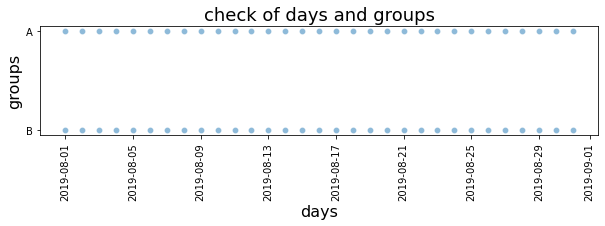

In [25]:
plt.figure(figsize=(10, 2))
sns.scatterplot(x=visi['date'], y=visi['group'], alpha=0.5) # задаём alpha=0.5, чтобы разглядеть наложение, если оно есть
plt.xlabel('days', fontsize=16)
plt.ylabel('groups', fontsize=16)
plt.xticks(rotation=90)
plt.title('check of days and groups', fontsize=18)
plt.show()

Все точки групп А и В появились парами, нет пропусков и наложений. Значит, считаем, что на каждый день действительно приходится одна группа А и одна В.

Посмотрим повнимательнее на столбец `visitors`.

In [26]:
print('Минимальное количество посетителей:', min(visi['visitors']))
print('Максимальное количество посетителей:', max(visi['visitors']))
print('Среднее количество посетителей:', visi['visitors'].mean())
print('Медианное количество посетителей:', visi['visitors'].median())

Минимальное количество посетителей: 361
Максимальное количество посетителей: 770
Среднее количество посетителей: 607.2903225806451
Медианное количество посетителей: 624.5


Никаких нулей или миллионов, это хорошо.

In [27]:
print('Суммарное количество посетителей группы А:', visi.loc[visi['group'] == 'A', 'visitors'].sum())
print('Суммарное количество посетителей группы B:', visi.loc[visi['group'] == 'B', 'visitors'].sum())
print('Среднее количество посетителей группы А:', visi.loc[visi['group'] == 'A', 'visitors'].mean())
print('Среднее количество посетителей группы B:', visi.loc[visi['group'] == 'B', 'visitors'].mean())
print('Медианное количество посетителей группы А:', visi.loc[visi['group'] == 'A', 'visitors'].median())
print('Медианное количество посетителей группы B:', visi.loc[visi['group'] == 'B', 'visitors'].median())

Суммарное количество посетителей группы А: 18736
Суммарное количество посетителей группы B: 18916
Среднее количество посетителей группы А: 604.3870967741935
Среднее количество посетителей группы B: 610.1935483870968
Медианное количество посетителей группы А: 619.0
Медианное количество посетителей группы B: 654.0


Есть различия в количестве посетителей в зависимости от группы. Но насколько велико влияние этих различий? Позже мы это выясним.

<a id='p1'></a>
## Часть 1. Приоритизация гипотез

Вычислим ICE и отсортируем гипотезы по убыванию приоритетности.

In [28]:
hypo['ICE'] = (hypo['impact'] * hypo['confidence'] / hypo['efforts']).round(1)
hypo.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Теперь вычислим RICE и отсортируем гипотезы по убыванию приоритетности.

In [29]:
hypo['RICE'] = (hypo['reach'] * hypo['ICE']).round(1)
hypo.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,39.9
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,8.8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,3.9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


В оба топ-3 (для ICE и для RICE) попали гипотезы `0` и `7`, что должно обнадёживать. Четвёртное место дважды заняла гипотеза `6`. В антирейтинг-4 оба раза попали одни и те же гипотезы: `3`, `1`, `5` и `4`. Гипотеза `8` опустилась с первого на пятое место. Гипотеза `2` поднялась с пятого на второе.

Удивляться тут нечему, все гипотезы подверглись влиянию параметра `reach`, который и внёс свой ощутимый вклад.

<a id='p2'></a>
## Часть 2. Анализ А/В теста

Создадим массив уникальных пар значений дат и групп теста.

In [30]:
dates_groups = orders[['date','group']].drop_duplicates() 
dates_groups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


62 строки - по 31 на каждую из обеих групп.

Соберём агрегированные кумулятивные по дням данные о заказах. Воспользуемся только что созданным датасетом `dates_groups` и применим к нему лямбда-функцию. Внутри лямбда-функции применим функцию `np.logical_and` (логическое "и") к датасету `orders`. Для каждой уникальной пары значений дат и групп теста посчитаем **с накоплением по мере увеличения даты** количество уникальных транзакций, количество уникальных идентификаторов пользователей, совершивших заказ и суммарную выручку.

Как получается накопление?  

Перебирается датасет `dates_group`. Первый из 62 шагов: есть какая-то дата и какая-то группа, оказавшиеся в первой строке этого датасета. Они становятся частью условия функции `np.logical_and`.

Перебирается датасет `orders`. Питон находит **все** пары дата-группа, которые удовлетворяют обоим условиям, обозначеным внутри функции `np.logical_and`. Но из всех удовлетворяющих дат в результат пойдёт самая поздняя. Группа удовлетворяет в данный момент только одна, она и пойдёт в результат. Будут посчитаны уникальные транзакции, уникальные `'visitor_id` и сумма выручки.

Второй из 62 шагов: тоже самое для новой пары дата-группа. И т.д.

In [31]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_aggregated                                                                                                                                     # для `group` можно было бы написать и `min`, это ничего бы не поменяло.                                      

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Готово. Даты отсортировались, видно, что есть накопление. Так и должно быть.

Аналогичным образом соберём агрегированные кумулятивные данные о пользователях.

In [32]:
visitors_aggregated = dates_groups.apply(lambda x: visi[np.logical_and(visi['date'] <= x['date'], visi['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated   

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Готово. Даты отсортировались, видно, что есть накопление.

Теперь объединим датасеты `orders_aggregated` и `visitors_aggregated` и переименуем некоторые столбцы.

In [33]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns=['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']
cumulative_data

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


<a id='p2.1'></a>
#### а) Графики кумулятивной выручки по группам 

Теперь можно строить графики кумулятивной выручки по группам.

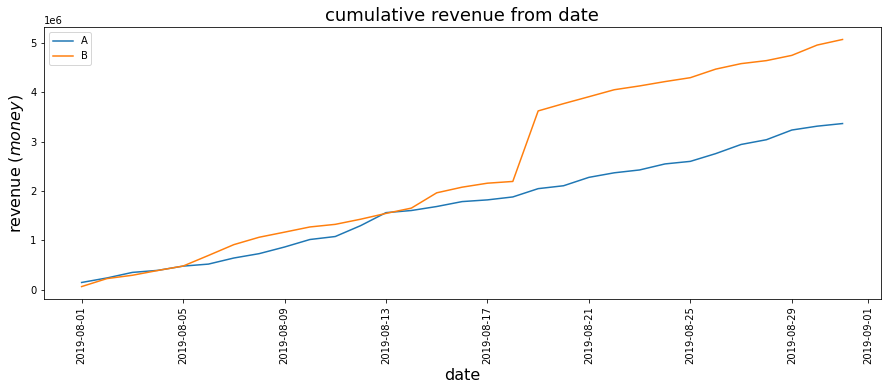

In [34]:
cumulative_revenue_a = cumulative_data.loc[cumulative_data['group'] == 'A'][['date', 'revenue', 'transactions']]
cumulative_revenue_b = cumulative_data.loc[cumulative_data['group'] == 'B'][['date', 'revenue', 'transactions']]
plt.figure(figsize=(15,5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.xlabel('date', fontsize=16)
plt.ylabel('revenue ($money$)', fontsize=16)
plt.xticks(rotation=90)
plt.title('cumulative revenue from date', fontsize=18)
plt.legend()
plt.show()

Сначала выручка накапливалась в одном темпе. Затем группа В стала ненамного опережать группу А. Затем они пеменялись. Затем произошёл резкий скачок у группы В. Это, наверняка, выброс (очень крупная покупка). Дальше темпы роста снова были плюс-минус одинаковыми.

<a id='p2.2'></a>
#### б) Графики кумулятивного среднего чека по группам

Для построения графиков кумулятивного среднего чека (т.е. среднюю выручку с одной транзакции) нужно разделить кумулятивную выручку на кумулятивное число заказов.

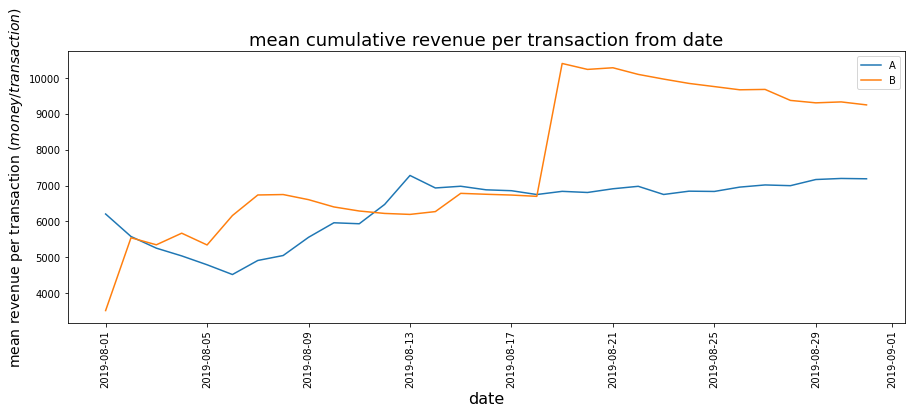

In [35]:
plt.figure(figsize=(15,5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['transactions'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['transactions'], label='B')
plt.xlabel('date', fontsize=16)
plt.ylabel('mean revenue per transaction ($money/transaction$)', fontsize=14)
plt.xticks(rotation=90)
plt.title('mean cumulative revenue per transaction from date', fontsize=18)
plt.legend()
plt.show()

Тот же резкий скачок между 18-19 августа у группы В, после которого остался длинный высокий шлейф. Это объясняется тем, что мы построили график именно для кумулятивных значений. Если бы мы строили не кумулятивный график, то сразу же после резкого роста был бы резкий спад.

***Мне это напомнило получение зарплаты. Резко становится много денег, которые медленно, но верно будут убывать до следующей зарплаты (на языке кумулятвной выручки - до следующей крупной выручки).***

Однако, в нашем случае графики не внесли ясности, какая же из групп действительно показывает лучшие результаты. К счастью, есть ещё методы.

<a id='p2.3'></a>
#### в) График относительного изменения кумулятивного среднего чека группы B к группе A

Этот график хорош тем, что при равенстве кумулятивных средних чеков друг другу значение по оси ординат равно нулю.

In [36]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
merged_cumulative_revenue.head(3)

,date,revenue_a,transactions_a,revenue_b,transactions_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54


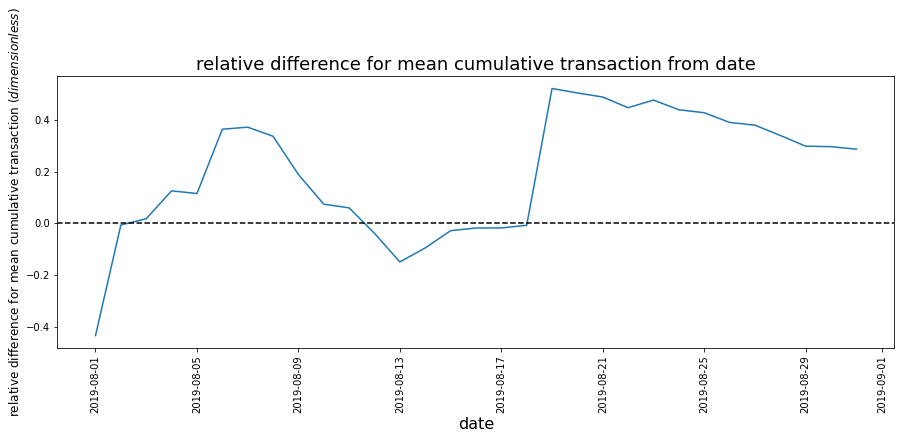

In [37]:
plt.figure(figsize=(15,5))
plt.plot(merged_cumulative_revenue['date'], ((merged_cumulative_revenue['revenue_b'] / \
                                              merged_cumulative_revenue['transactions_b']) \
                                             / (merged_cumulative_revenue['revenue_a'] / \
                                                merged_cumulative_revenue['transactions_a']) - 1))
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('date', fontsize=16)
plt.ylabel('relative difference for mean cumulative transaction ($dimensionless$)', fontsize=12) # ВОТ ЖЕ ПОДПИСЬ
plt.xticks(rotation=90)
plt.title('relative difference for mean cumulative transaction from date', fontsize=18)
plt.show()

На участках графика ниже нуля кумулятивный средний чек больше у группы А. Выше нуля - у группы В. Но можно ли быть уверенным в том, что группа В так и останется лидером? Ведь после выброса график пополз вниз. Пока что ответа нет.

<a id='p2.4'></a>
#### г) Графики кумулятивной конверсии по группам

Вычислим конверсию и посторим графики.

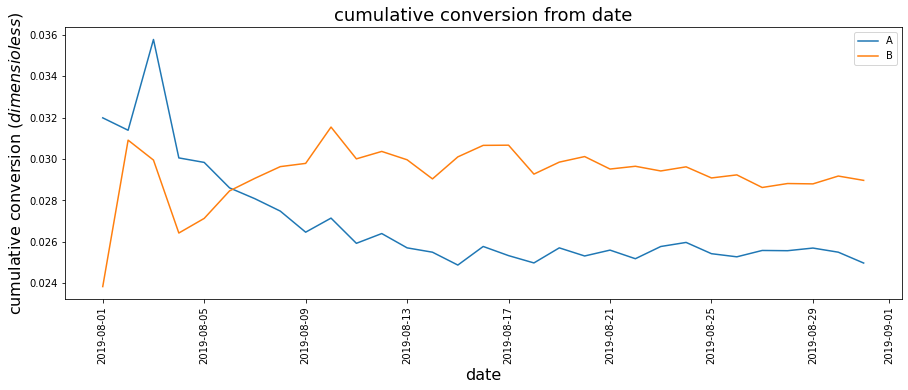

In [38]:
cumulative_data['conversion'] = cumulative_data['transactions'] / cumulative_data['visitors']
cumulative_data_a = cumulative_data.loc[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data.loc[cumulative_data['group'] == 'B']

plt.figure(figsize=(15,5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.xlabel('date', fontsize=16)
plt.ylabel('cumulative conversion ($dimensioless$)', fontsize=16)
plt.xticks(rotation=90)
plt.title('cumulative conversion from date', fontsize=18)
plt.legend()
plt.show()

Кумулятивная конверсия большую часть месяца лучше у группы B. Но всего лишь на 0.5-0.8 процентных пунктов. Не так уж и много.

<a id='p2.5'></a>
#### д) График относительного изменения кумулятивной конверсии группы B к группе A

Без лишних слов построим график.

In [39]:
merged_cumulative_conversion = cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']], \
                                                                               left_on='date', right_on='date', how='left', \
                                                                               suffixes=['_a', '_b'])
merged_cumulative_conversion.head(3)

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950


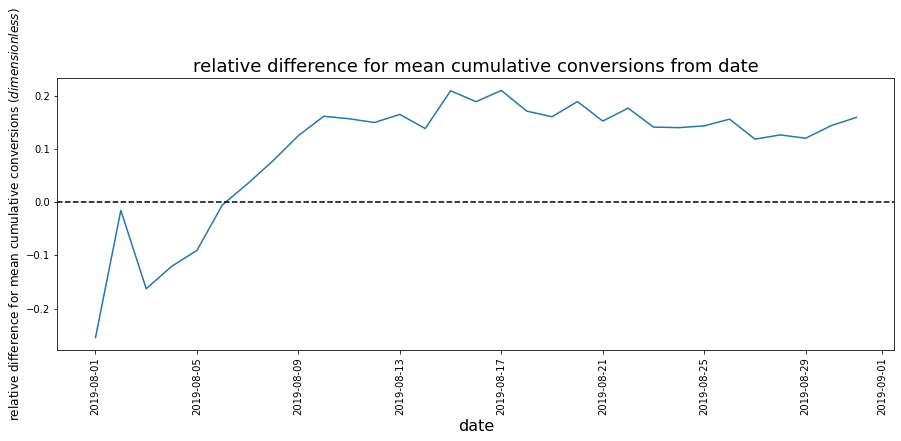

In [40]:
plt.figure(figsize=(15,5))
plt.plot(merged_cumulative_conversion['date'], (merged_cumulative_conversion['conversion_b'] / merged_cumulative_conversion['conversion_a'] - 1))
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('date', fontsize=16)
plt.ylabel('relative difference for mean cumulative conversions ($dimensionless$)', fontsize=12)
plt.xticks(rotation=90)
plt.title('relative difference for mean cumulative conversions from date', fontsize=18)
plt.show()

Там, где график выше нуля (почти везде) кумулятивная конверсия у группы В лучше, чем у группы А. Но стоит иметь в виду, что этот график ещё не вышел на установившийся режим. 

<a id='p2.6'></a>
#### е) Точечный график количества заказов по пользователям

Чтобы понять, какая же из двух групп принесёт в дальнейшем больше выручки, чем другая (при условии, что они всё-таки различаются), нужно найти и вычистить аномалии. Займёмся этим.

Ранее мы уже выяснили, применив `orders['visitor_id'].value_counts()`, что есть некоторые пользователи, совершившие ощутимо больше покупок, чем остальные. Отобразим их на диаграмме рассеяния.

In [41]:
transactions_by_visitors = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
transactions_by_visitors.columns=['visitor_id', 'transactions']
transactions_by_visitors.head(3)

,visitor_id,transactions
0,5114589,1
1,6958315,1
2,11685486,1


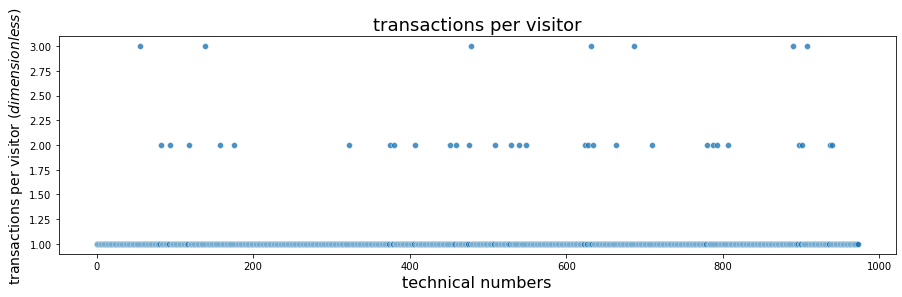

In [42]:
x_values = pd.Series(range(0,len(transactions_by_visitors)))
plt.figure(figsize=(15, 4))
sns.scatterplot(x=x_values, y=transactions_by_visitors['transactions'], alpha=0.8)
plt.xlabel('technical numbers', fontsize=16)
plt.ylabel('transactions per visitor ($dimensionless$)', fontsize=14)
plt.title('transactions per visitor', fontsize=18)
plt.show()

7 человек сделало по три заказа. Это не типично для выборки, но и выбросом это вряд ли можно назвать.

<a id='p2.7'></a>
#### ж) 95-й и 99-й перцентили количества заказов на пользователя

In [43]:
np.percentile(transactions_by_visitors['transactions'], [95, 99, 99.4])

array([1., 2., 3.])

Несмотря на то, что пользователи с тремя заказами вышли за рамки 99-й перцентили, мы оставим их в выборке. Принципиальной разницы между 2 и 3 заказами в месяц нет.

<a id='p2.8'></a>
#### и) Диаграмма распределения стоимостей заказов

In [44]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


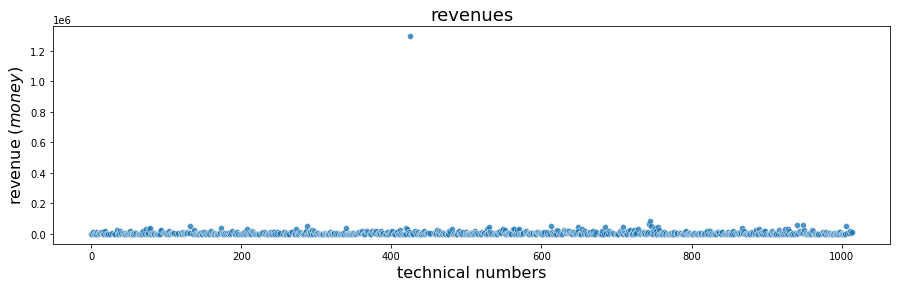

In [45]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(15, 4))
sns.scatterplot(x=x_values, y=orders['revenue'], alpha=0.8)
plt.xlabel('technical numbers', fontsize=16)
plt.ylabel('revenue ($money$)', fontsize=16)
plt.title('revenues', fontsize=18)
plt.show()

Есть 1 выброс. Ограничим график, чтобы рассмотреть его нижнюю часть получше.

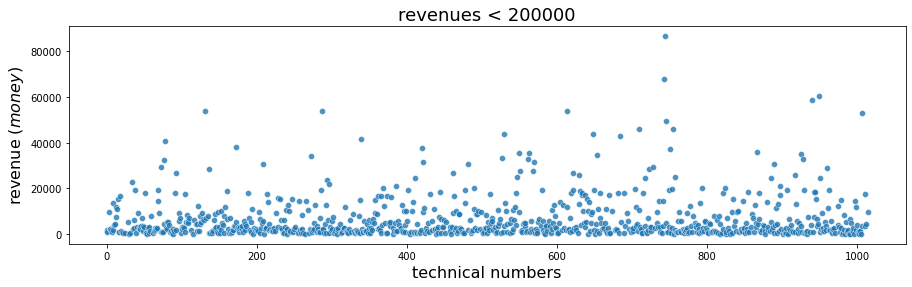

In [46]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(15, 4))
sns.scatterplot(x=x_values, y=orders.loc[orders['revenue'] < 200000, 'revenue'], alpha=0.8)
plt.xlabel('technical numbers', fontsize=16)
plt.ylabel('revenue ($money$)', fontsize=16)
plt.title('revenues < 200000', fontsize=18)
plt.show()

На глаз нельзя определить, что считать выбросом, а что нет. Нужно считать перцентили.

<a id='p2.9'></a>
#### к) 95-й и 99-й перцентили стоимости заказов

In [47]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% транзакций было на сумму больше 28000 и не более 1% транзакций было на сумму больше 53904. Установим верхнюю границу того, что мы не считаем выбросом, в 53904.

<a id='p2.10'></a>
#### л) Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным, то есть без удаления аномальных пользователей.  
И сразу выскажем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

Подготовим "сырые" данные: по частям соберём датасет `raw_data`.

In [48]:
visitors_a_daily = visi[visi['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visi[visi['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

In [49]:
display(visitors_a_daily.head(3))
visitors_b_daily.head(3)

,date,visitors_per_date_a
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507


,date,visitors_per_date_b
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509


In [50]:
visitors_a_cumulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg({'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1)
visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']

visitors_b_cumulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg({'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1)
visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']

In [51]:
display(visitors_a_cumulative.head(3))
visitors_b_cumulative.head(3)

,date,visitors_cumulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845


,date,visitors_cumulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803


In [52]:
orders_a_daily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id': 'nunique', 'revenue': 'sum'}))
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_b_daily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id': 'nunique', 'revenue': 'sum'}))
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

In [53]:
display(orders_a_daily.head(3))
orders_b_daily.head(3)

,date,orders_per_date_a,revenue_per_date_a
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473


,date,orders_per_date_b,revenue_per_date_b
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049


In [54]:
orders_a_cumulative = orders_a_daily.apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg({'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}), axis=1).sort_values(by=['date'])
orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']

orders_b_cumulative = orders_b_daily.apply(lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg({'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}), axis=1).sort_values(by=['date'])
orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']

In [55]:
display(orders_a_cumulative.head(3))
orders_b_cumulative.head(3)

,date,orders_cumulative_a,revenue_cumulative_a
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854


,date,orders_cumulative_b,revenue_cumulative_b
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850


In [56]:
raw_data = visitors_a_daily.merge(visitors_b_daily, left_on='date', right_on='date', how='left')\
                           .merge(visitors_a_cumulative, left_on='date', right_on='date', how='left')\
                           .merge(visitors_b_cumulative, left_on='date', right_on='date', how='left')\
                           .merge(orders_a_daily, left_on='date', right_on='date', how='left')\
                           .merge(orders_b_daily, left_on='date', right_on='date', how='left')\
                           .merge(orders_a_cumulative, left_on='date', right_on='date', how='left')\
                           .merge(orders_b_cumulative, left_on='date', right_on='date', how='left')
raw_data.head(3)

,date,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b
0,2019-08-01,719,713,719,713,23,142779,17,59758,23,142779,17,59758
1,2019-08-02,619,581,1338,1294,19,91602,23,162043,42,234381,40,221801
2,2019-08-03,507,509,1845,1803,24,112473,14,67049,66,346854,54,288850


На время отвлечёмся от только что созданного датасета `raw_data`.

Создадим переменные `orders_by_visitors_a` и `orders_by_visitors_b`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [57]:
orders_by_visitors_a = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_by_visitors_a.columns = ['visitor_id', 'orders']

orders_by_visitors_b = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_by_visitors_b.columns = ['visitor_id', 'orders']

In [58]:
display(orders_by_visitors_a.head(3))
orders_by_visitors_b.head(3)

,visitor_id,orders
0,11685486,1
1,54447517,1
2,66685450,1


,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1


Для подготовки выборки к проверке по критерию Манна-Уитни объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Количество нулей будет равно разнице между суммой всех пользователей группы А или В (столбец `visitors_per_date_a` или `visitors_per_date_b` датасета `raw_data`) и **количеством** (не суммой) записей о заказах в датасетах `orders_by_visitors_a` или `orders_by_visitors_b`.

In [59]:
sample_a = pd.concat([orders_by_visitors_a['orders'], pd.Series(0, index=np.arange(raw_data['visitors_per_date_a'].sum() \
                                                        - len(orders_by_visitors_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_visitors_b['orders'], pd.Series(0, index=np.arange(raw_data['visitors_per_date_b'].sum() \
                                                        - len(orders_by_visitors_b['orders'])), name='orders')], axis=0)

In [60]:
sample_a

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [61]:
sample_b

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

Проверим, чему в `sample_a` и `sample_b` равны суммы значений. Суммы должны совпасть с результатами распределения оригинального датасета `orders`.

In [62]:
sample_a.sum()

468

In [63]:
sample_b.sum()

548

In [64]:
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

Есть совпадение.

Итак, оценим, наконец, статистическую значимость различий в конверсии между группами по «сырым» данным. Посчитаем p-value.

Нулевая гипотеза: различий в конверсии между группами по «сырым» данным нет. Альтернативная гипотеза: различия есть.

In [65]:
(stats.mannwhitneyu(sample_a, sample_b)[1]).round(3)

0.011

p-value получилось больше 0.01 и меньше 0.05. Пограничная ситауция. Освежим в памяти нулевую гипотезу: "различий в конверсии между группами нет". Иными словами, есть 1.1%-ая вероятность получить наблюдаемое нами распределение, если различий в конверсии между группами действительно нет. В очередной раз отложим окончательные выводы.

А ещё при помощи `sample_a` или `sample_b` можно найти конверсию соответствующей группы. Если сложить все значения, получим количество заказов. Если посчитать количество строк, получим общее число пользователей (не только покупателей). Поделив первое на второе, получим конверсию. То же самое, только быстро, по счастливому стечению обстоятельств можно сделать функцией `mean()`.

In [66]:
print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.160


Конверсия группы В на 16% лучше, чем у группы А. Для "сырых" данных.

<a id='p2.11'></a>
#### м) Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между группами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [67]:
(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]).round(3)

0.829

Вероятность получить наблюдамое распределение средних чеков, если различий в среднем чеке между группами действительно нет, составляет 82.9%. Это очень много. **Не отвергаем** нулевую гипотезу.

Вычислим относительные различия в среднем чеке между группами.

In [68]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.287


Довольно большие различия, почти на 29% средний чек группы В выше, чем у группы А. На первый взгляд может показаться странным, что такое ощутимое различие в средних чеках не заставило нас отвергнуть нулевую гипотезу, но теория вероятностей - вещь упрямая.

<a id='p2.12'></a>
#### н) Статистическая значимость различий в конверсии между группами по «очищенным» данным

Очистим данные от выбросов, когда сумма заказа превышает 53904.

Соберём выбросы в переменную `abnormal_visitors`, где будут содержаться `visitor_id`, чьи покупки признаны аномальными.

In [69]:
visitors_with_many_orders = pd.concat([orders_by_visitors_a.loc[orders_by_visitors_a['orders'] > 3]['visitor_id'], \
                                    orders_by_visitors_b.loc[orders_by_visitors_b['orders'] > 3]['visitor_id']], axis=0)
visitors_with_expencive_orders = orders.loc[orders['revenue'] > 53904]['visitor_id']
abnormal_visitors = pd.concat([visitors_with_many_orders, visitors_with_expencive_orders], axis=0).drop_duplicates()
display(abnormal_visitors.head(3))
len(abnormal_visitors)

425    1920142716
743    4133034833
744     888512513
Name: visitor_id, dtype: int64

9

9 `visitor_id`, совершили слишком крупные покупки, поэтому из дальнейшего анализа мы их исключаем.

In [70]:
sample_a_filtered = pd.concat([orders_by_visitors_a[np.logical_not(orders_by_visitors_a['visitor_id'].isin(abnormal_visitors))]['orders'],\
        pd.Series(0, index=np.arange(raw_data['visitors_per_date_a'].sum() - len(orders_by_visitors_a['orders'])), name='orders')], axis=0)
sample_b_filtered = pd.concat([orders_by_visitors_b[np.logical_not(orders_by_visitors_b['visitor_id'].isin(abnormal_visitors))]['orders'],\
        pd.Series(0, index=np.arange(raw_data['visitors_per_date_b'].sum() - len(orders_by_visitors_b['orders'])), name='orders')], axis=0)
display(sample_a_filtered.head(3))
sample_b_filtered.head(3)

0    1
1    1
2    1
Name: orders, dtype: int64

0    1
1    1
2    1
Name: orders, dtype: int64

Оценим статистическую значимость различий в конверсии между группами по «очищенным» данным. Посчитаем p-value.

Нулевая гипотеза: различий в конверсии между группами по «очищенным» данным нет. Альтернативная гипотеза: различия есть.

In [71]:
(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]).round(3)

0.01

Есть 1%-ая вероятность получить наблюдаемое нами распределение, если различий в конверсии между группами действительно нет.

Когда мы проверяли "сырые" данные, p-value равнялось 0.011. Получается, что после удаления выбросов мы стали на 0.1 процентный пункт менее уверенными, в том, что различий в конверсии между группами действительно нет.

In [72]:
print("{0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

0.164


Для "очищенных" данных конверсия группы В на 16.4% лучше, чем у группы А. У "сырых" данных этот показатель равнялся 16%. 

То есть на 0.4 процентных пункта увеличилось преимущество группы В по относительной конверсии.

<a id='p2.13'></a>
#### п) Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Теперь проверим статистическую значимость различий в среднем чеке между группами по очищенным данным. Гипотезы прежние. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [73]:
(stats.mannwhitneyu((orders.loc[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue']),\
                    (orders.loc[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue']))[1]).round(3)

0.901

Вероятность получить наблюдамое распределение средних чеков по "очищенным" данным, если различий в среднем чеке между группами действительно нет, составляет 90.1%. Это снова очень много. **Не отвергаем** нулевую гипотезу.
Когда мы проверяли эту же величину для "сырых" данных, получили хоть меньший, но всё равно очень большой по рамкам p-value результат 82.9%.

А как изменились после удаления выбросов относительные различия в среднем чеке?

Нулевая гипотеза: различий в среднем чеке между группами по «очищенным» данным нет. Альтернативная гипотеза: различия есть.

In [74]:
print('{0:.3f}'.format(orders.loc[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue'].mean()\
                       / orders.loc[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue'].mean()-1))

-0.032


Если перед удалением выбросов почти на 29% средний чек группы В был выше, чем у группы А, то теперь средний чек группы А на 3.2% больше. Косвенно такие перемены можно объяснить увеличением p-value до огромных 90.1% после удаления выбросов. Ведь чем ближе к 100% p-value, тем больше стремятся уравняться величины из средних чеков.

<a id='p2.14'></a>
#### р) Решение по результатам теста

Перед тем как принять окончательное решение, выпишем некоторые сделанные ранее выводы.

**Кумулятивная выручка**. Сначала выручка накапливалась в одном темпе. Затем группа В стала ненамного опережать группу А. Затем они пеменялись. Затем произошёл резкий скачок у группы В. Это, наверняка, выброс (очень крупная покупка). Дальше темпы роста снова были плюс-минус одинаковыми.

**Сравнение конверсий после удаления выбросов.** Есть 1%-ая вероятность получить наблюдаемое нами распределение, если различий в конверсии между группами действительно нет.

Когда мы проверяли "сырые" данные, p-value равнялось 0.011. Получается, что после удаления выбросов мы стали на 0.1 процентный пункт менее уверенными, в том, что различий в конверсии между группами действительно нет.

**Как конверсия группы В относится к конверсии группы А после удаления выбросов.** Для "очищенных" данных конверсия группы В на 16.4% лучше, чем у группы А. У "сырых" данных этот показатель равнялся 16%. 

То есть на 0.4 процентных пункта увеличилось преимущество группы В по относительной конверсии.

**Сравнение распределений средних чеков после удаления выбросов.** Вероятность получить наблюдамое распределение средних чеков по "очищенным" данным, если различий в среднем чеке между группами действительно нет, составляет 90.1%. Это снова очень много. **Не отвергаем** нулевую гипотезу.
Когда мы проверяли эту же величину для "сырых" данных, получили хоть меньший, но всё равно очень большой по рамкам p-value результат 82.9%.

**Как средний чек группы В относится к среднему чеку группы А после удаления выбросов.** Если перед удалением выбросов почти на 29% средний чек группы В был выше, чем у группы А, то теперь средний чек группы А на 3.2% больше. Косвенно такие перемены можно объяснить увеличением p-value до огромных 90.1% после удаления выбросов. Ведь чем ближе к 100% p-value, тем больше стремятся уравняться величины из средних чеков.

Учитывая вышеизложенное...

Средний чек у двух групп после удаления выбросов одинаковый. Это значит, что на пользователя (на его средний чек), который уже решил совершить покупку, наверняка **не окажет** влияние то, был он в группе А или В. Это может нас (аналитиков) обрадовать в плане того, что для принятия решения придётся ориентироваться только на конверсии, потому что равенство по одному показателю исключает гипотетечески возможные противоречия с результатами теста для другого показателя.

Есть очень маленькая (1%), хоть и статистически значимая вероятность, получить такие результаты, которые мы получили, если конверсии двух групп после удаления выбросов действительно равны. Этому же числу равняется вероятность **ошибиться**, отклонив нулевую гипотезу, если она на самом деле была верной.

Мы **не ошибёмся** с вероятностью 99%, если отклоним нулевую гипотезу о равенстве конверсий двух групп (при условии, что на самом деле верна альтернаятивная гипотеза). 

На данном этапе теста конверсия группы В больше на 16.4%. Это очень неплохой показатель.

Из предложенных трёх вариантов решения остаются только два:

- Остановить тест, зафиксировать победу одной из групп; 

- Продолжить тест.

Против продолжения теста есть следующие аргументы:
- продолжая тест, мы аккумулируем упущенную выгоду, потому что пользователи, попавшие в группу А, недоконвертируются;
- продолжая тест, мы тратим ресурсы (время и, возможно, деньги).

Таком образом, фиксируем останавливаем тест и фиксируем победу группы В.

<a id='p3'></a>
## Вывод

На 99% мы можем быть уверены, что стоит остановить тест и зафисировать победу группы В.

Конверсия группы В лучше на 16.4%.

Средние чеки у обеих групп одинаковые.